<a href="https://colab.research.google.com/github/tyukei/AI/blob/master/report3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題1
scikit-learnの toy datasets (https://scikit-learn.org/stable/datasets/toy_dataset.html#toy-datasets) のいずれかから正解なしデータを作成し、適切な教師なし学習問題を設定せよ。そのうえで学習を行い、結果を示すPythonコードを提出せよ。なお、irisデータおよびdiabetesデータに対するクラスタリングは対象外とする。

まず、ライブラリーを読み込む

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.mixture import GaussianMixture

## sklearn.datasets.load_wine
toy datasetsからload_wineを選択した。
ワインを識別するデータセットである

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine



説明変数は13種類ある。
1. alcohol アルコール濃度
2. malic_acid リンゴ酸
3. ash 灰
4. alcalinity_of_ash 灰のアルカリ成分（？
5. magnesium マグネシウム
6. total_phenols 総フェノール類量
7. flavanoids フラボノイド（ポリフェノールらしい）
8. nonflavanoid_phenols 非フラボノイドフェノール類
9. proanthocyanins プロアントシアニジン（ポリフェノールの一種らしい）
10. color_intensity 色の強さ
11. hue 色合い
12. od280/od315_of_diluted_wines ワインの希釈度合い
13. proline プロリン（アミノ酸の一種らしい）

目的変数はワインの品種である
14. ワインの品種

In [30]:
wine = load_wine()
X = wine.data[:3,:]
X

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03]])

In [33]:
wine.target[:3]

array([0, 0, 0])

クラスタリング結果のプロットを関数にする

In [20]:
def result_plot(X, y):
  ''' 
  Xは2次元に限定、yは各データのクラスタ番号
  '''
  for t in set(y):
    plt.scatter(X[y==t,0], X[y==t,1])
  plt.legend(set(y))

## 階層的クラスタリング
クラスタリングには階層的と非階層的の２種類がある
最も似ているグループをまとめるボトムアップと
最も離れているグループを分けるトップダウンの２通りのやり方がある。

AgglomerativeClusteringを用いて階層的クラスタリングを行う。クラスタ数が3になったところで処理を止める。

特徴量は特徴１(alcohol )と特徴２(malic_acid)にする

In [34]:
X = wine.data[:,0:2]

In [35]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

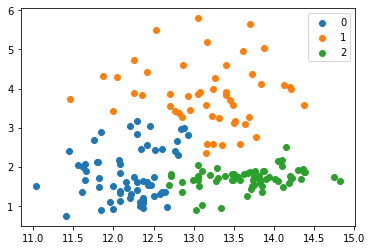

In [36]:
result_plot(X, ac.labels_)

類似度はAgglomerativeClusteringの引数linkageで指定する。可能な値は'ward', 'complete', 'average', 'single' で、デフォルトは 'ward'。

completeのとき

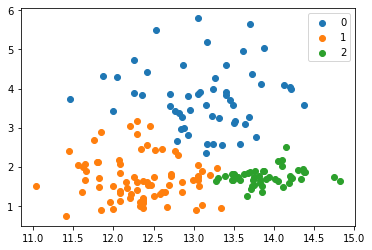

In [38]:
ac = AgglomerativeClustering(linkage='complete', n_clusters=3)
ac.fit(X)
result_plot(X, ac.labels_)

averageのとき

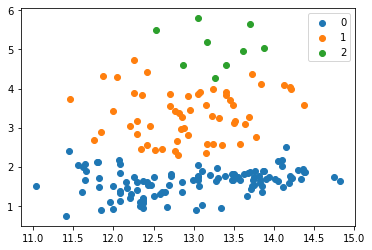

In [37]:
ac = AgglomerativeClustering(linkage='average', n_clusters=3)
ac.fit(X)
result_plot(X, ac.labels_)

singleのとき

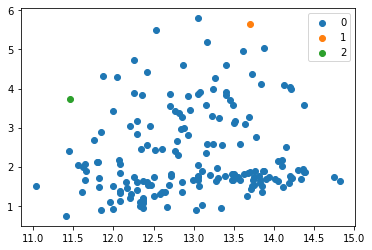

In [39]:
ac = AgglomerativeClustering(linkage='single', n_clusters=3)
ac.fit(X)
result_plot(X, ac.labels_)